### Event Distribution of Mice with Time

In [1]:
import sys
sys.path.insert(0, '../scripts')

import numpy as np
import direction_transition as dit
from meals import graph_group_stats, find_meals_paper
import intervals as invs
from preprocessing import get_all_sheet_names, read_excel_by_sheet

ctrl_path = '../reversal_ctrl.xlsx'
cask_path = '../reversal_cask.xlsx'
ctrl_sheets = get_all_sheet_names(ctrl_path)
cask_sheets = get_all_sheet_names(cask_path)

collect_quantile = 0.7
pellet_quantile = 0.7
time_threshold = 60
pellet_count_threshold = 2

In [2]:
ctrl_block_fir_meal = []
ctrl_block_fir_meal_prop = []
ctrl_meal_avg_acc = []
for sheet in ctrl_sheets:
  temp_time = []
  temp_prop = []
  temp_acc = []
  meals = []
  temp_cnt = []
  
  data = read_excel_by_sheet(sheet, ctrl_path, cumulative_accuracy=False)  
  blocks = dit.split_data_to_blocks(data)
  
  for block in blocks:
    meal, meal_pellet_cnt, meal_acc = find_meals_paper(block,
                                                        time_threshold=time_threshold, 
                                                        pellet_threshold=pellet_count_threshold)
    meals.extend(meal)
    temp_cnt.extend(meal_pellet_cnt)
    temp_acc.extend(meal_acc)
    
  data_stats = dit.get_transition_info(blocks, [time_threshold, pellet_count_threshold], reverse=False)
  avg_ratio, avg_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
  ctrl_block_fir_meal.append(avg_time)
  ctrl_meal_avg_acc.append(np.mean(temp_acc))
  ctrl_block_fir_meal_prop.append(avg_ratio)
  # dit.graph_tranition_stats(data_stats, blocks, sheet)

In [3]:
exp_block_fir_meal = []
exp_block_fir_meal_prop = []
exp_meal_avg_acc = []

for sheet in cask_sheets:
  temp_time = []
  temp_prop = []
  temp_acc = []
  meals = [] 
  temp_cnt = []
  
  data = read_excel_by_sheet(sheet, cask_path, cumulative_accuracy=False)  
  blocks = dit.split_data_to_blocks(data)
  
  for block in blocks:
    meal, meal_pellet_cnt, meal_acc = find_meals_paper(block,
                                                      time_threshold=time_threshold, 
                                                      pellet_threshold=pellet_count_threshold)
    meals.extend(meal)
    temp_cnt.extend(meal_pellet_cnt)
    temp_acc.extend(meal_acc)

  data_stats = dit.get_transition_info(blocks, [time_threshold, pellet_count_threshold], reverse=False)
  avg_ratio, avg_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
  exp_block_fir_meal.append(avg_time)
  exp_meal_avg_acc.append(np.mean(temp_acc))
  exp_block_fir_meal_prop.append(avg_ratio)
  # dit.graph_tranition_stats(data_stats, blocks, sheet)

In [4]:
invs.perform_T_test(ctrl_block_fir_meal, exp_block_fir_meal, test_side='less')

P Value is  0.023132441969055544
Experiment group is significantly less than control group


Control Size: 19
CASK Size: 17
Control Average: 59.33075372632103
CASK Average: 49.11965737382971
Control Standard Deviation: 13.972824500968294
CASK Standard Deviation: 15.65132435761014


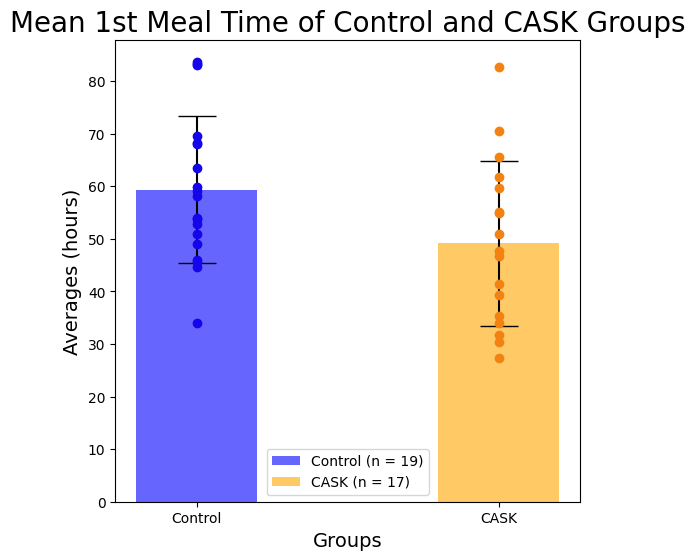

In [ ]:
graph_group_stats(ctrl_block_fir_meal, exp_block_fir_meal, 
                  stats_name='Mean 1st Meal Time', unit='minutes', exp_name='CASK')

In [6]:
invs.perform_T_test(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, test_side='less')

P Value is  0.8449776491242029
There is no significant difference between the two groups.


Control Size: 19
CASK Size: 17
Control Average: 0.36127172930868295
CASK Average: 0.39245508355780273
Control Standard Deviation: 0.06590126873752107
CASK Standard Deviation: 0.11212621378191232


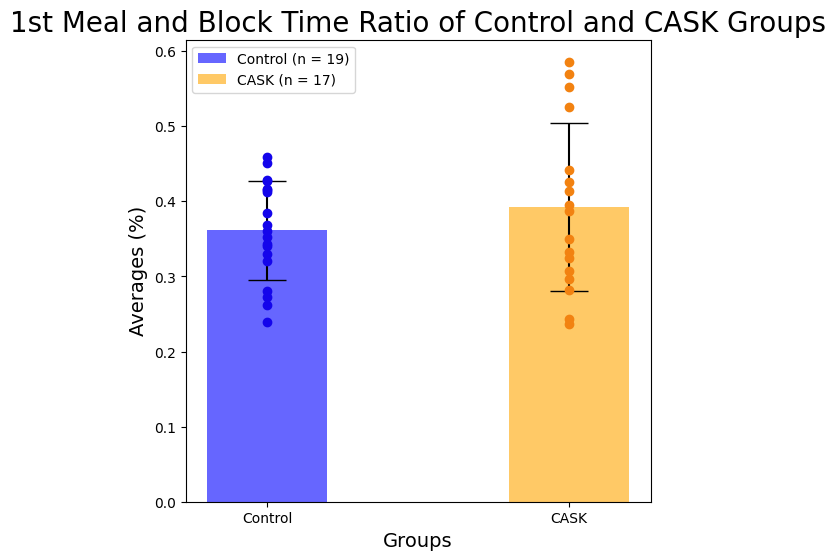

In [7]:
graph_group_stats(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, 
                  unit='%', stats_name='1st Meal and Block Time Ratio', exp_name='CASK')

In [ ]:
invs.perform_T_test(ctrl_meal_avg_acc, exp_meal_avg_acc)

P Value is  0.9546523075136408
There is no significant difference between the two groups.


* In flipping poke case, we find that there is left or right stage (mice display a tendency to stick to one direction)
* there is only one stage at a time, and transition can take some times (1-2 stage to move to another)
* Generally, the accuracy is improved (>50~60% at the end and higher than the beginning)